In [1]:
import pandas as pd 
import numpy as np  
import random
from sklearn.model_selection import train_test_split  
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [2]:
# Data preparation
path = '/Users/Kassi/Desktop/voice-gender/voice.csv'
voice_data = pd.read_csv(path)
voice_data = voice_data.values

In [3]:
voices = voice_data[:, :-1] 
labels = voice_data[:, -1:]

In [4]:
from sklearn.preprocessing import LabelEncoder
gender_encoder = LabelEncoder()
labels = gender_encoder.fit_transform(labels)

/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [5]:
# randomly shuffle data
voices_tmp = []  
lables_tmp = []  
index_shuf = range(len(voices)) 
random.shuffle(index_shuf) 
for i in index_shuf:  
    voices_tmp.append(voices[i])  
    lables_tmp.append(labels[i])  
voices = np.array(voices_tmp)  
labels = np.array(lables_tmp) 

In [6]:
train_x, test_x, train_y, test_y = train_test_split(voices, labels, test_size=0.2) 

In [7]:
from sklearn.metrics import classification_report, confusion_matrix
def Random_Forest_Classifier():
    error_rate = []
    nvals = range(1,301,30)
    for i in nvals:
        rfc = RandomForestClassifier(n_estimators=i)
        rfc.fit(train_x,train_y)
        pred_y_i = rfc.predict(test_x)
        error_rate.append(np.mean(pred_y_i != test_y))
    plt.plot(nvals, error_rate, color='blue', linestyle='dashed', marker='o',
    markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. N Estimators')
    plt.xlabel('N Estimators')
    plt.ylabel('Error Rate')
    plt.show()
    nloc = error_rate.index(min(error_rate))
    print('Lowest error of %s occurs at n=%s.' % (error_rate[nloc], nvals[nloc]))
    print('The highest in-sample accuracy in Random Forest is %s when n=%s.' % (1-error_rate[nloc], nvals[nloc]))
    # Using our optimal k value, we will run the analysis again and proceed to quantify our classification accuracy.
    rfc = RandomForestClassifier(n_estimators= nvals[nloc])
    rfc.fit(train_x,train_y)
    pred_y = rfc.predict(test_x)
    print('\n')
    print('Out-of-sample accuracy in Random Forest:%s' % (accuracy_score(test_y, pred_y)) )
    print('\n')
    print('Confusion Matrix:')
    print(confusion_matrix(test_y, pred_y))
    print('\n')
    print('Classification Report:')
    print(classification_report(test_y, pred_y))

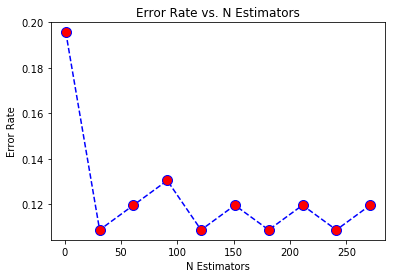

Lowest error of 0.108695652174 occurs at n=31.
The highest in-sample accuracy in Random Forest is 0.891304347826 when n=31.


Out-of-sample accuracy in Random Forest:0.869565217391


Confusion Matrix:
[[48  5]
 [ 7 32]]


Classification Report:
             precision    recall  f1-score   support

          0       0.87      0.91      0.89        53
          1       0.86      0.82      0.84        39

avg / total       0.87      0.87      0.87        92



In [8]:
Random_Forest_Classifier()

In [9]:
# Is it enough of these two features to make predictions? 
## Random Forest with 2 features ('meanfun', 'IQR')

train_x = train_x[:,[5,12]]
test_x = test_x[:,[5,12]]

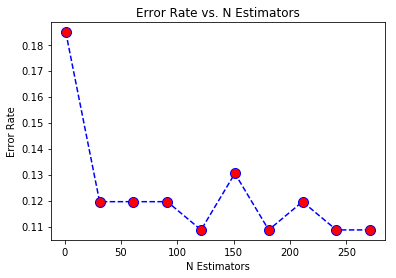

Lowest error of 0.108695652174 occurs at n=121.
The highest in-sample accuracy in Random Forest is 0.891304347826 when n=121.


Out-of-sample accuracy in Random Forest:0.891304347826


Confusion Matrix:
[[48  5]
 [ 5 34]]


Classification Report:
             precision    recall  f1-score   support

          0       0.91      0.91      0.91        53
          1       0.87      0.87      0.87        39

avg / total       0.89      0.89      0.89        92



In [10]:
Random_Forest_Classifier()

In [11]:
# We did not observe much improvement in performance when we implement Random Forest with 2 features.